In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [3]:
import os
import zipfile
local_zip = "/content/archive_.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/archive_.zip' mode='r'>>

In [4]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("accuracy") > 0.90):
            print("\n Reached 90% accuracy so canceling the training")
            self.model.stop_training=True

In [5]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.8,
    horizontal_flip=True,
    fill_mode='nearest')

In [6]:
VALIDATION_DIR = "/tmp/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(48,48),
    class_mode='categorical',
    batch_size=32
)

Found 28709 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(48,48),
    class_mode='categorical',
    batch_size=32
)

Found 7178 images belonging to 7 classes.


In [9]:
callbacks = myCallbacks()

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=300, validation_data = validation_generator, verbose = 1, callbacks = [callbacks])

Epoch 1/300
898/898 [==============================] - 32s 35ms/step - loss: 1.4970 - accuracy: 0.4137 - val_loss: 1.2165 - val_accuracy: 0.5378
Epoch 2/300
898/898 [==============================] - 32s 35ms/step - loss: 1.5045 - accuracy: 0.4111 - val_loss: 1.2091 - val_accuracy: 0.5408
Epoch 3/300
898/898 [==============================] - 32s 35ms/step - loss: 1.4977 - accuracy: 0.4106 - val_loss: 1.2103 - val_accuracy: 0.5421
Epoch 4/300
898/898 [==============================] - 32s 35ms/step - loss: 1.4995 - accuracy: 0.4153 - val_loss: 1.2613 - val_accuracy: 0.5228
Epoch 5/300
898/898 [==============================] - 31s 35ms/step - loss: 1.4930 - accuracy: 0.4158 - val_loss: 1.2431 - val_accuracy: 0.5325
Epoch 6/300
898/898 [==============================] - 32s 35ms/step - loss: 1.4952 - accuracy: 0.4192 - val_loss: 1.2108 - val_accuracy: 0.5393
Epoch 7/300
898/898 [==============================] - 31s 35ms/step - loss: 1.4868 - accuracy: 0.4204 - val_loss: 1.2907 - val_ac

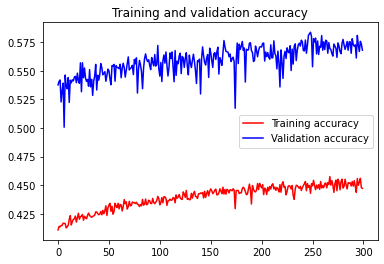

<Figure size 432x288 with 0 Axes>

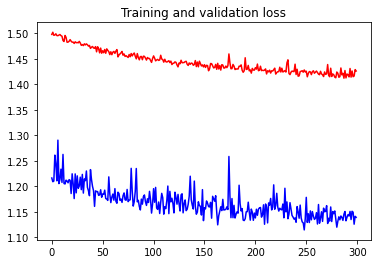

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.show()